C:\Users\vamsh\AppData\Local\Temp\ipykernel_1904\4068432201.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["Date"] = pd.to_datetime(df["Date"])


                           Date       Open       High        Low      Close  \
285   2018-11-29 00:00:00-05:00  68.673458  69.589358  68.673458  69.001251   
743   2018-11-30 00:00:00-05:00  69.059076  70.042470  68.779483  69.753235   
1201  2018-12-03 00:00:00-05:00  70.698073  72.105671  70.563099  71.989975   
1659  2018-12-04 00:00:00-05:00  72.018907  72.414195  70.023203  70.293159   
2117  2018-12-06 00:00:00-05:00  68.644532  69.348335  67.391195  69.329056   

       Volume  Dividends  Stock Splits Company  
285   2625800        0.0           0.0       A  
743   2279500        0.0           0.0       A  
1201  4265200        0.0           0.0       A  
1659  4263800        0.0           0.0       A  
2117  3505900        0.0           0.0       A  
<class 'pandas.core.frame.DataFrame'>
Index: 602962 entries, 285 to 602604
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  

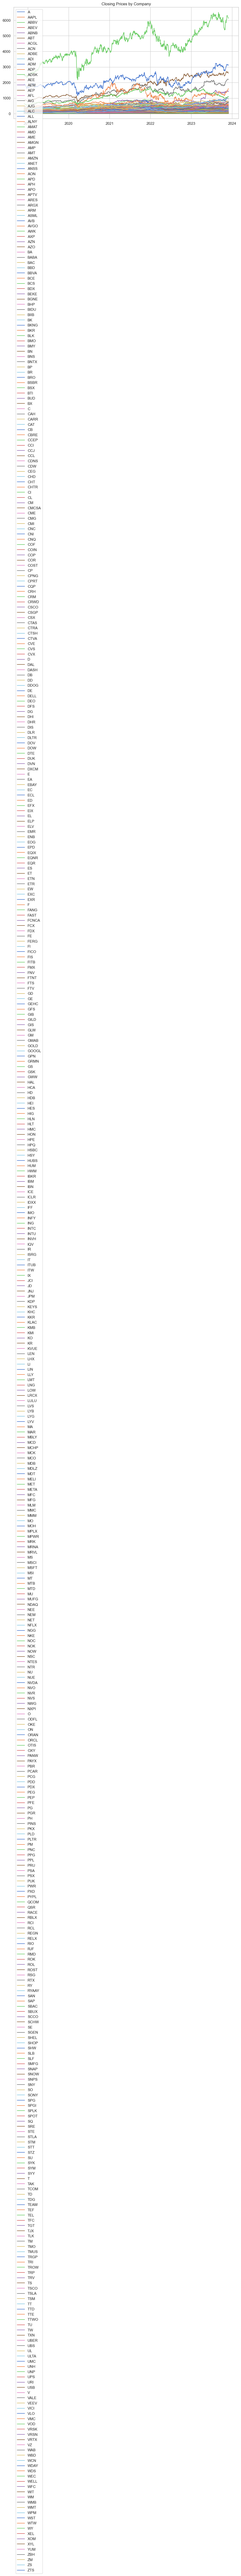

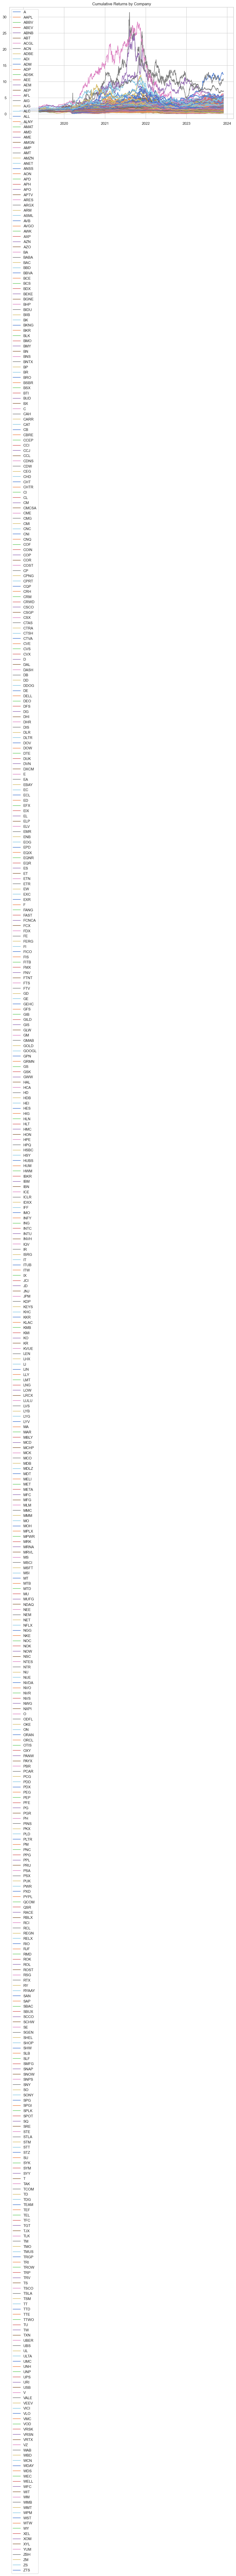

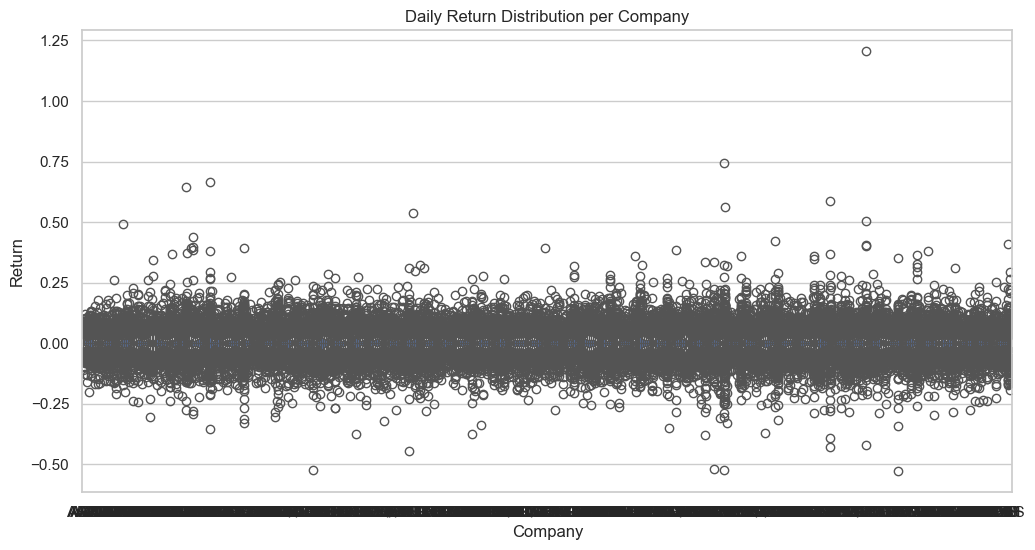

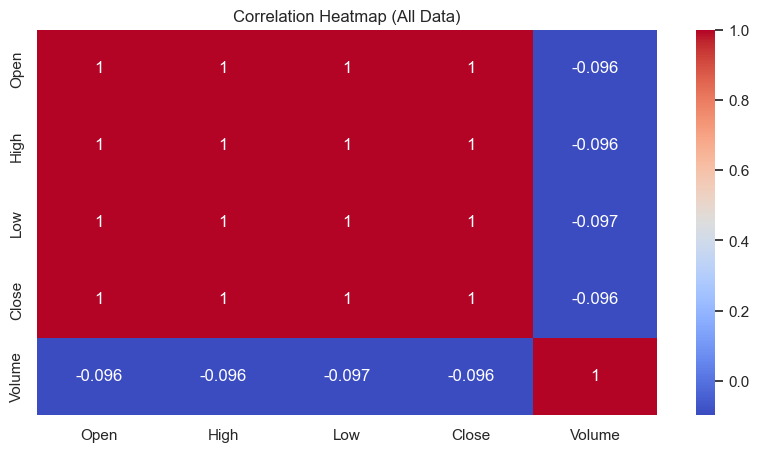

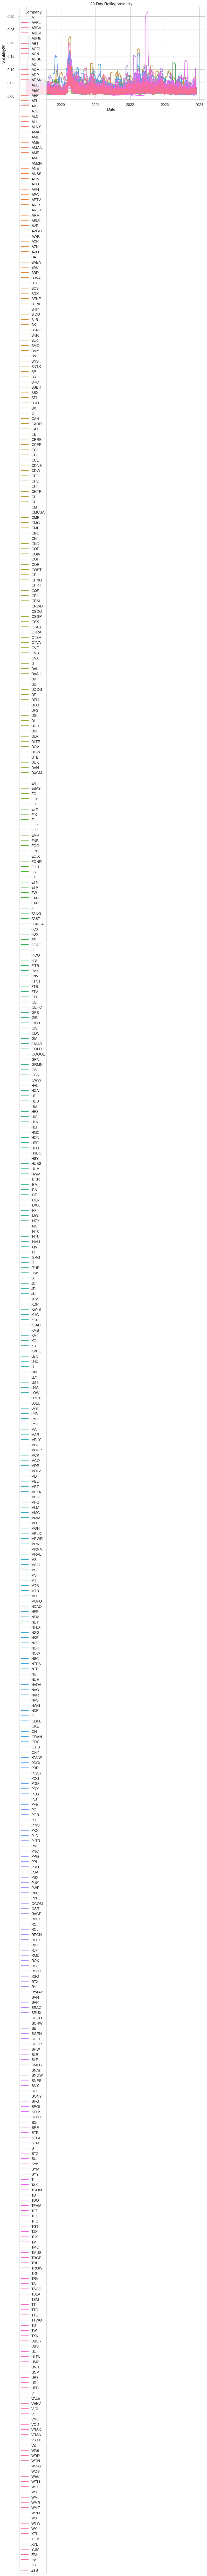

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

files = glob.glob("../stock_details_5_years.csv")
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs, ignore_index=True)
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(["Company", "Date"])
print(df.head())
print(df.info())
print(df.describe())

df["Return"] = df.groupby("Company")["Close"].pct_change()
df["Log_Return"] = np.log(df["Close"] / df.groupby("Company")["Close"].shift(1))
df["MA20"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(20).mean())
df["MA50"] = df.groupby("Company")["Close"].transform(lambda x: x.rolling(50).mean())
df["Volatility20"] = df.groupby("Company")["Return"].transform(lambda x: x.rolling(20).std())
df["Cumulative_Return"] = df.groupby("Company")["Return"].transform(lambda x: (1 + x).cumprod())
df["Range"] = df["High"] - df["Low"]

arr = df[["Open", "High", "Low", "Close", "Volume"]].dropna().to_numpy()
print(np.mean(arr, axis=0))
print(np.std(arr, axis=0))
print(np.percentile(arr, [25, 75], axis=0))

sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(12, 6))
for c in df["Company"].unique():
    temp = df[df["Company"] == c]
    plt.plot(temp["Date"], temp["Close"], label=c)
plt.title("Closing Prices by Company")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for c in df["Company"].unique():
    temp = df[df["Company"] == c]
    plt.plot(temp["Date"], temp["Cumulative_Return"], label=c)
plt.title("Cumulative Returns by Company")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Company", y="Return", data=df)
plt.title("Daily Return Distribution per Company")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df[["Open", "High", "Low", "Close", "Volume"]].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (All Data)")
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Date", y="Volatility20", hue="Company")
plt.title("20-Day Rolling Volatility")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Return", y="Volatility20", hue="Company")
plt.title("Return vs Volatility")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Company", y="Volume", data=df.groupby("Company")["Volume"].mean().reset_index())
plt.title("Average Trading Volume per Company")
plt.show()
